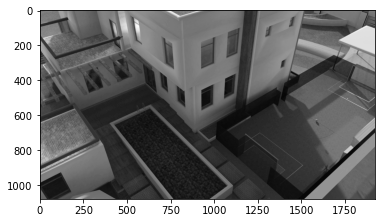

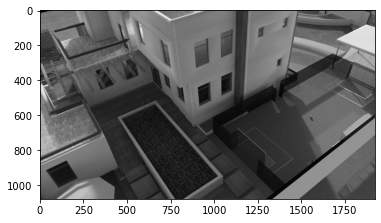

In [25]:
# import the graph
import numpy as np
import matplotlib.pyplot as plt
# import computer vision library
import cv2
# import the image
img = cv2.imread('Frame1.png')
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# display the image
plt.imshow(gray, cmap='gray')
plt.show()

img2 = cv2.imread('Frame2.png')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap='gray')
plt.show()




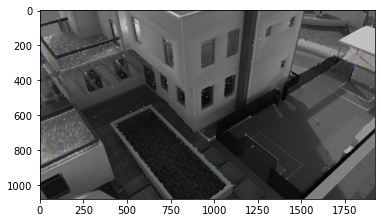

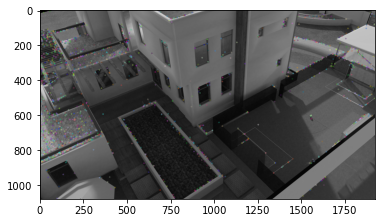

In [26]:
# detect the sailent features
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
# draw the features
img = cv2.drawKeypoints(gray, kp, img)
img2 = cv2.drawKeypoints(gray2, kp2, img2)
# display the image
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()

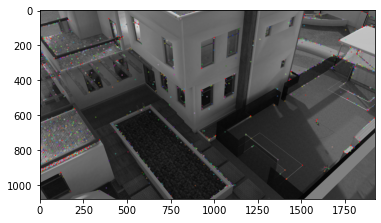

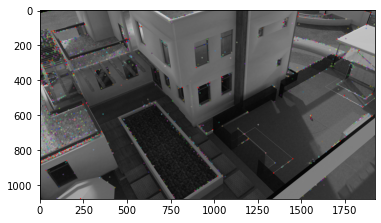

In [27]:
# detect the corners
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)
plt.imshow(img)
plt.show()

# detect the corners
corners2 = cv2.goodFeaturesToTrack(gray2, 100, 0.01, 10)
corners2 = np.int0(corners2)
for i in corners2:
    x, y = i.ravel()
    cv2.circle(img2, (x, y), 3, 255, -1)
plt.imshow(img2)
plt.show()

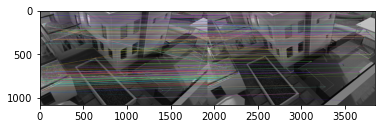

In [28]:
# match the features
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des2, k=2)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
img3 = cv2.drawMatchesKnn(gray, kp, gray2, kp2, good, None, flags=2)
plt.imshow(img3)
plt.show()

# match the features
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des2, k=2)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
        
img3 = cv2.drawMatchesKnn(gray, kp, gray2, kp2, good, None, flags=2)




[[ 9.09782028e-08 -1.31616618e-05  4.03512811e-03]
 [ 1.48481486e-05 -1.98238167e-06 -4.48213260e-02]
 [-4.86690222e-03  4.24238298e-02  1.00000000e+00]]


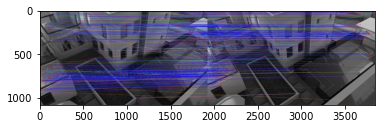

In [29]:
# estimate the fundamental matrix 
pts1 = []
pts2 = []
for m in good:
    pts2.append(kp2[m[0].trainIdx].pt)
    pts1.append(kp[m[0].queryIdx].pt)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)
print(F)
# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]
# draw the epipolar lines
for i in range(len(pts1)):
    cv2.circle(img3, (pts1[i][0], pts1[i][1]), 3, (255, 0, 0), -1)
    cv2.circle(img3, (pts2[i][0] + gray.shape[1], pts2[i][1]), 3, (255, 0, 0), -1)
    cv2.line(img3, (pts1[i][0], pts1[i][1]), (pts2[i][0] + gray.shape[1], pts2[i][1]), (0, 0, 255), 1)
plt.imshow(img3)
plt.show()





In [30]:
# # using extrinsic parameters and intrinsic parameters to calculate the fundamental matrix
# # intrinsic parameters
# K = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
# # extrinsic parameters
# R = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
# t = np.array([[0.0], [0.0], [0.0]])
# # calculate the fundamental matrix
# F = K.T @ R @ t
# print(F)


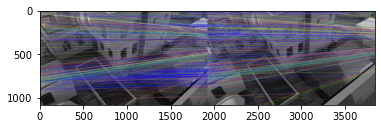

In [31]:
# find the correctly matched points that meet the epipolar constraint
pts1 = []
pts2 = []
for m in good:
    pts2.append(kp2[m[0].trainIdx].pt)
    pts1.append(kp[m[0].queryIdx].pt)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
# calculate the epipolar lines
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
# draw the epipolar lines
for i in range(len(pts1)):
    color = tuple(np.random.randint(0, 255, 3).tolist())
    x0, y0 = map(int, [0, -lines1[i][2] / lines1[i][1]])
    x1, y1 = map(int, [gray.shape[1], -(lines1[i][2] + lines1[i][0] * gray.shape[1]) / lines1[i][1]])
    cv2.line(img3, (x0, y0), (x1, y1), color, 1)
    cv2.circle(img3, (pts1[i][0], pts1[i][1]), 3, color, -1)
    x0, y0 = map(int, [0, -lines2[i][2] / lines2[i][1]])
    x1, y1 = map(int, [gray.shape[1], -(lines2[i][2] + lines2[i][0] * gray.shape[1]) / lines2[i][1]])
    cv2.line(img3, (x0 + gray.shape[1], y0), (x1 + gray.shape[1], y1), color, 1)
    cv2.circle(img3, (pts2[i][0] + gray.shape[1], pts2[i][1]), 3, color, -1)
plt.imshow(img3)
plt.show()

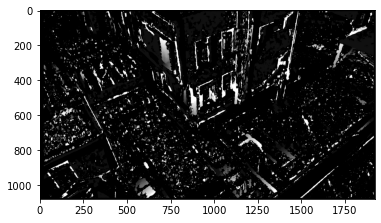

[[ 9.09782028e-08 -1.31616618e-05  4.03512811e-03]
 [ 1.48481486e-05 -1.98238167e-06 -4.48213260e-02]
 [-4.86690222e-03  4.24238298e-02  1.00000000e+00]]
[[ 9.09782028e-08 -1.31616618e-05  4.03512811e-03]
 [ 1.48481486e-05 -1.98238167e-06 -4.48213260e-02]
 [-4.86690222e-03  4.24238298e-02  1.00000000e+00]]
[[ 0.9905679   0.09783929 -0.09593077]
 [ 0.08647044  0.09673995  0.99154639]
 [ 0.10629253 -0.9904892   0.08736728]]
[[9.95323617e-01]
 [9.65960584e-02]
 [3.13305120e-04]]
[[-2.15052824e-02  3.96672948e-03 -2.47892052e+01]
 [ 6.78935721e-03 -4.37063440e-02 -6.46699223e+00]
 [ 2.11606215e-05 -4.78244212e-06 -6.32349570e-02]]
[[ 5.66215183e-01 -5.91761370e-02  4.48388539e+02]
 [-1.37011285e-01  1.01976581e+00  1.20857297e+02]
 [-4.46216459e-04  4.66348610e-05  1.40318498e+00]]


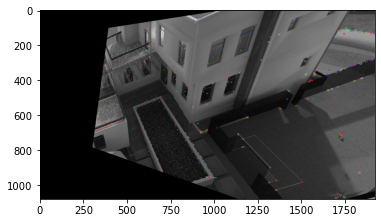

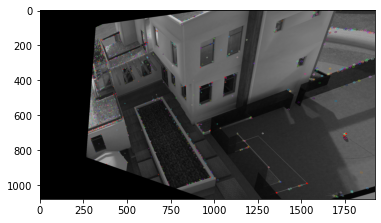

In [33]:
# estaplish the disparity map 
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(gray, gray2)
plt.imshow(disparity, 'gray')
plt.show()

# rectification
# find the fundamental matrix
pts1 = []
pts2 = []
for m in good:
    pts2.append(kp2[m[0].trainIdx].pt)
    pts1.append(kp[m[0].queryIdx].pt)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)
print(F)
# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]
# calculate the essential matrix
K = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
E = K.T @ F @ K
print(E)
# calculate the rotation and translation matrix
retval, R, t, mask = cv2.recoverPose(E, pts1, pts2, K)
print(R)
print(t)
# calculate the projection matrix
P1 = np.hstack((np.eye(3), np.zeros((3, 1))))
P2 = np.hstack((R, t))
# calculate the rectification matrix
retval, H1, H2 = cv2.stereoRectifyUncalibrated(pts1, pts2, F, gray.shape[::-1])
print(H1)
print(H2)
# rectify the images
img1_rectified = cv2.warpPerspective(img, H1, gray.shape[::-1])
img2_rectified = cv2.warpPerspective(img2, H2, gray.shape[::-1])
plt.imshow(img1_rectified)
plt.show()
plt.imshow(img2_rectified)
plt.show()
